In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trip_data = pd.read_csv('trip_all.csv')

# Filter Data

In [3]:

# Alternatively, you can use the IQR method
Q1 = trip_data['travel_time'].quantile(0.1)
Q3 = trip_data['travel_time'].quantile(0.9)
IQR = Q3 - Q1

# Set a multiplier for IQR to identify outliers
iqr_multiplier = 1.5

# Filter out rows with values outside the IQR range
filtered_trip_data_iqr = trip_data[(trip_data['travel_time'] >= Q1 - iqr_multiplier * IQR) & (trip_data['travel_time'] <= Q3 + iqr_multiplier * IQR)]

filtered_trip_data_iqr.shape


(3536, 9)

In [4]:
trip_data = trip_data[trip_data['travel_time'] < 120]
trip_data = trip_data[trip_data['dwell_time'] < 100]

In [5]:
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333
...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,BT02,BT01,44.416667,7.600000
3572,3573,1377,2022-10-30,09:21:27,10:07:42,BT01,BT02,46.250000,3.200000
3573,3574,1377,2022-10-30,12:39:33,13:31:48,BT02,BT01,52.250000,11.216667
3574,3575,1377,2022-10-30,13:51:30,14:43:18,BT01,BT02,51.800000,4.183333


In [6]:
# trip_data = filtered_trip_data_iqr

In [7]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333


In [8]:
trip_data.shape

(3542, 9)

# Add more features

In [9]:
trip_data['SITR'] = trip_data['dwell_time'] / trip_data['travel_time']

In [10]:
# add a new column for day of the week from the date column
# day of the week should be numbered 0-6, with 0 being Monday
trip_data['day_of_week'] = pd.to_datetime(trip_data['date']).dt.dayofweek

In [11]:
import pandas as pd

# Load your trip data DataFrame
# trip_data = pd.read_csv('your_trip_data.csv')

# Add a new column for day of the week from the date column
trip_data['day_name'] = pd.to_datetime(trip_data['date']).dt.day_name()

# Add a new column called time_of_day based on start_time
# where the time_of_day is rounded to the nearest quarter of an hour
# e.g. 12:07:00 would be 12:15:00
trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.round('15min').dt.time

# Convert time_of_day to a floating point number of hours
# e.g. 12:15:00 would be 12.25
trip_data['hour_of_day'] = trip_data['hour_of_day'].apply(lambda x: x.hour + x.minute / 60)



C:\Users\MSI\AppData\Local\Temp\ipykernel_25808\3351093847.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.round('15min').dt.time


In [12]:
trip_data['hour_of_day'] = trip_data['hour_of_day'].round(2)

In [13]:
# drop rows where count for hour_of_day is less than 10
trip_data = trip_data.groupby('hour_of_day').filter(lambda x : len(x)>10)
# drop rows where 'hour_of_day' is less than 6 and gretaer than 19
trip_data = trip_data[trip_data['hour_of_day'] >= 6]
trip_data = trip_data[trip_data['hour_of_day'] <= 20]

In [14]:
# add a new column for weekend or weekday from the day_of_week column
# 0 = weekday, 1 = weekend
trip_data['weekend'] = np.where(trip_data['day_of_week'] >= 5, 1, 0)

In [15]:
# add a new column for rush hour from the hour_of_day column
# 0 = not rush hour, 1 = rush hour
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 7) & (trip_data['hour_of_day'] <= 9), 1, 0)
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 16) & (trip_data['hour_of_day'] <= 18), 1, trip_data['rush_hour'])
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 12) & (trip_data['hour_of_day'] <= 2), 1, trip_data['rush_hour'])

In [16]:
ninety_percentile = trip_data['travel_time'].quantile(0.9)
trip_data['excess_travel_time'] = trip_data['travel_time'] - ninety_percentile

In [17]:
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time
0,1,116,2022-09-01,08:21:45,09:14:24,BT02,BT01,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,-4.788333
1,2,116,2022-09-01,10:22:41,11:19:49,BT01,BT02,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,-0.305000
2,3,116,2022-09-01,13:11:16,14:14:46,BT02,BT01,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,6.061667
3,4,116,2022-09-01,16:32:13,17:29:30,BT01,BT02,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.155000
4,5,116,2022-09-02,08:00:08,08:54:00,BT02,BT01,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,-3.571667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,BT02,BT01,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-13.021667
3572,3573,1377,2022-10-30,09:21:27,10:07:42,BT01,BT02,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-11.188333
3573,3574,1377,2022-10-30,12:39:33,13:31:48,BT02,BT01,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-5.188333
3574,3575,1377,2022-10-30,13:51:30,14:43:18,BT01,BT02,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-5.638333


In [18]:
# change start_terminal and end_terminal if BT01 then kandy-digana and if BT02 then digana-kandy
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT01', 'Kandy', trip_data['start_terminal'])
trip_data['start_terminal'] = np.where(trip_data['start_terminal'] == 'BT02', 'Digana', trip_data['start_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT01', 'Kandy', trip_data['end_terminal'])
trip_data['end_terminal'] = np.where(trip_data['end_terminal'] == 'BT02', 'Digana', trip_data['end_terminal'])

In [19]:
trip_data['Direction'] = trip_data['start_terminal'] + '-' + trip_data['end_terminal']

In [20]:
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,-4.788333,Digana-Kandy
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,-0.305000,Kandy-Digana
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,6.061667,Digana-Kandy
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.155000,Kandy-Digana
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,-3.571667,Digana-Kandy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-13.021667,Digana-Kandy
3572,3573,1377,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-11.188333,Kandy-Digana
3573,3574,1377,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-5.188333,Digana-Kandy
3574,3575,1377,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-5.638333,Kandy-Digana


In [21]:
trip_data['hour_of_day'].value_counts()

hour_of_day
11.25    108
9.75     104
7.75     100
9.25      97
8.25      95
14.25     93
12.25     92
13.75     90
12.75     90
15.75     89
10.75     89
6.75      87
16.75     87
10.25     84
11.75     84
14.75     83
8.75      80
15.25     76
16.25     75
6.25      74
7.25      71
17.25     70
12.00     68
14.50     66
13.25     65
7.50      64
13.00     63
7.00      62
14.00     54
10.50     53
17.75     51
12.50     51
11.50     50
15.00     50
9.50      50
16.50     49
10.00     49
8.00      46
13.50     45
18.00     44
6.50      44
11.00     43
8.50      43
15.50     43
16.00     42
9.00      41
17.00     40
6.00      35
17.50     34
18.25     32
18.50     29
18.75     24
19.50     15
19.25     14
19.75     11
Name: count, dtype: int64

In [22]:
trip_data

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,-4.788333,Digana-Kandy
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,-0.305000,Kandy-Digana
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,6.061667,Digana-Kandy
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.155000,Kandy-Digana
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,-3.571667,Digana-Kandy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3572,1377,2022-10-30,08:11:22,08:55:47,Digana,Kandy,44.416667,7.600000,0.171107,6,Sunday,8.25,1,1,-13.021667,Digana-Kandy
3572,3573,1377,2022-10-30,09:21:27,10:07:42,Kandy,Digana,46.250000,3.200000,0.069189,6,Sunday,9.25,1,0,-11.188333,Kandy-Digana
3573,3574,1377,2022-10-30,12:39:33,13:31:48,Digana,Kandy,52.250000,11.216667,0.214673,6,Sunday,12.75,1,0,-5.188333,Digana-Kandy
3574,3575,1377,2022-10-30,13:51:30,14:43:18,Kandy,Digana,51.800000,4.183333,0.080759,6,Sunday,13.75,1,0,-5.638333,Kandy-Digana


# Visualizations

In [25]:
# Calculate on-time performance
trip_data['on_time'] = trip_data['excess_travel_time'] >= 0

# On-Time Performance
on_time_percentage = trip_data['on_time'].mean() * 100
print(f"On-Time Performance: {on_time_percentage:.2f}%")

# Travel Time Analysis
import plotly.express as px
import plotly.graph_objects as go
# Day of the Week Analysis
day_of_week_performance = trip_data.groupby('day_name')['on_time'].mean().reset_index()
fig = px.line(day_of_week_performance, x='day_name', y='on_time', title='On-Time Performance by Day of the Week')
fig.show()

On-Time Performance: 10.01%


In [26]:
# Hourly Analysis
hourly_performance = trip_data.groupby('hour_of_day')['on_time'].mean().reset_index()
fig = px.line(hourly_performance, x='hour_of_day', y='on_time', title='On-Time Performance by Hour of the Day')
fig.show()

In [27]:
weekend_performance = trip_data.groupby('weekend')['on_time'].mean().reset_index()
fig = px.bar(weekend_performance, x='weekend', y='on_time', title='On-Time Performance: Weekend vs. Weekday')
fig.update_xaxes(type='category', categoryorder='total ascending')
fig.show()

In [28]:
directional_performance = trip_data.groupby('Direction')['on_time'].mean().reset_index()
fig = px.bar(directional_performance, x='Direction', y='on_time', title='On-Time Performance by Direction')
fig.show()

In [43]:
trip_data.shape

(3388, 17)

In [44]:
trip_data.to_csv('history_all.csv', index=False)

# visualization

# use the history.csv for dashboard visualization.

# 1. 'Travel Time by Hour of the Day (Weekdays vs. Weekends)'

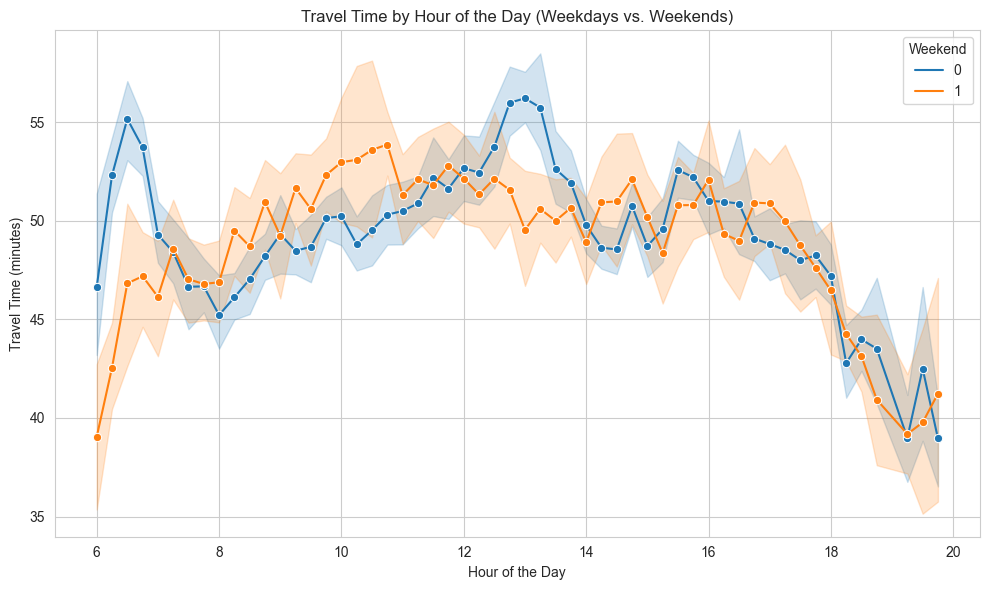

In [45]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


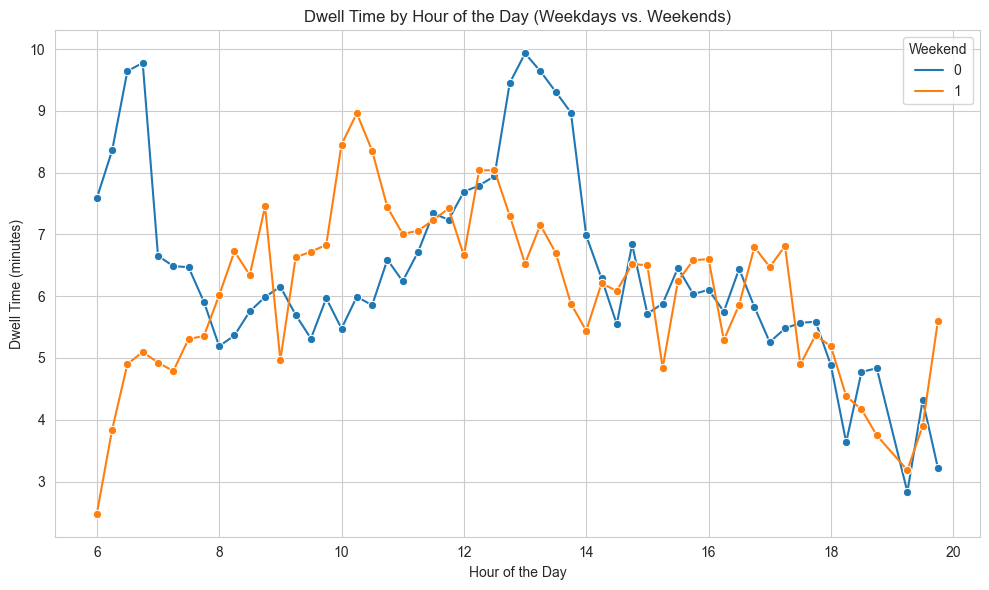

In [46]:
avg_travel_hour_of_day = trip_data.groupby(['hour_of_day', 'weekend'])['dwell_time'].mean().reset_index()

# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_travel_hour_of_day, x='hour_of_day', y='dwell_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


# 2. Dwell Time by Hour of the Day (Direction)

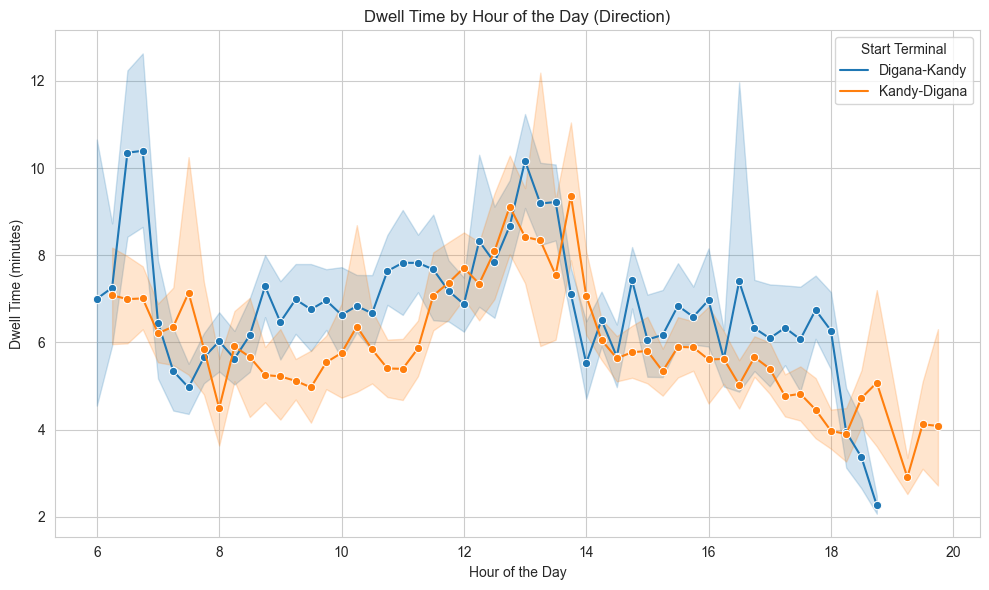

In [47]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='dwell_time', hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Direction)')
plt.legend(title='Start Terminal')
plt.tight_layout()
plt.show()



# 3. Travel Time by Hour of the Day (Direction)

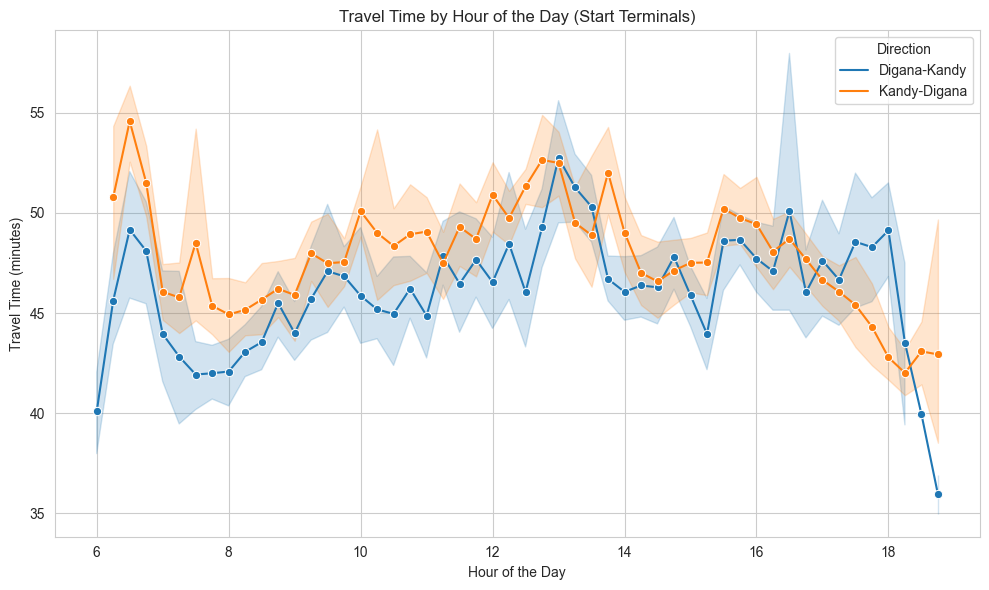

In [27]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Start Terminals)')
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

# 4. Average SITR by Hour of the Day (Direction)

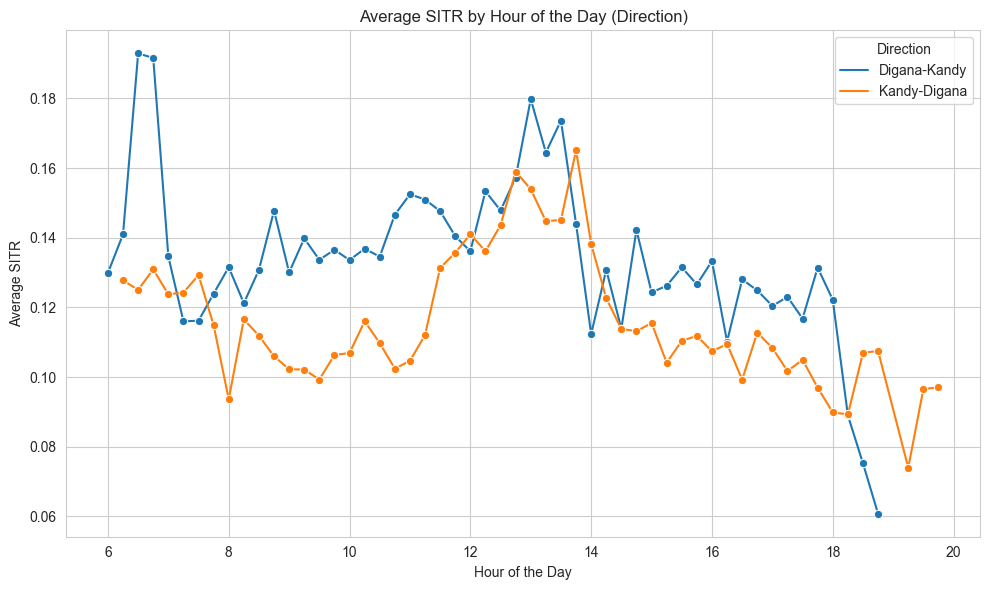

In [48]:
# Line chart showing how the ratio of travel time to dwell time varies over the hour of day.
average_ratios_by_hour = trip_data.groupby(['hour_of_day','Direction'])['SITR'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_ratios_by_hour, x='hour_of_day', y='SITR',hue='Direction', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average SITR')
plt.title('Average SITR by Hour of the Day (Direction)')
plt.legend(title='Direction')
plt.tight_layout()
plt.show()



# List of days in the correct order for plotting
# days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# 5. Excess Travel Time by Day of the Week

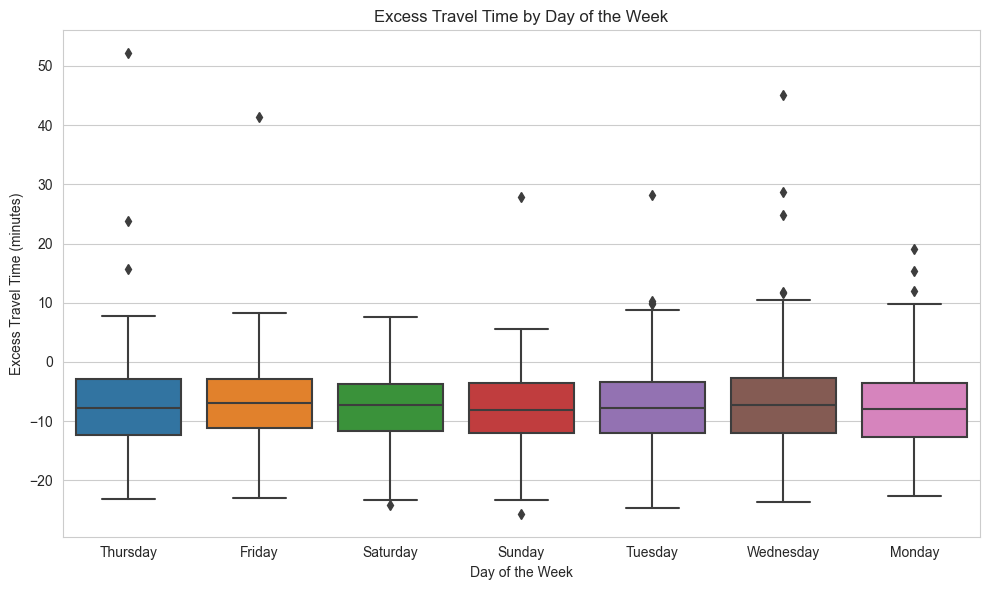

In [49]:
# plot the excess travel time by day of the week using a boxplot
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')


plt.figure(figsize=(10, 6))
sns.boxplot(data=trip_data, x='day_name', y='excess_travel_time')
plt.xlabel('Day of the Week')
plt.ylabel('Excess Travel Time (minutes)')
plt.title('Excess Travel Time by Day of the Week')
plt.tight_layout()


In [30]:
# # Set the style of seaborn for better visualization
# sns.set_style('whitegrid')

# # Calculate average travel time by day of the week
# avg_travel_time_by_day = trip_data.groupby(['day_of_week', 'day_name'])['travel_time'].mean().reset_index()

# # Plot bar chart with different colors for each day_name
# plt.figure(figsize=(10, 6))
# sns.barplot(data=avg_travel_time_by_day, x='day_of_week', y='travel_time', hue='day_name')
# plt.xlabel('Day of the Week')
# plt.ylabel('Average Travel Time (minutes)')
# plt.title('Average Travel Time by Day of the Week')
# plt.legend(title='Day Name')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

<Axes: xlabel='hour_of_day', ylabel='count'>

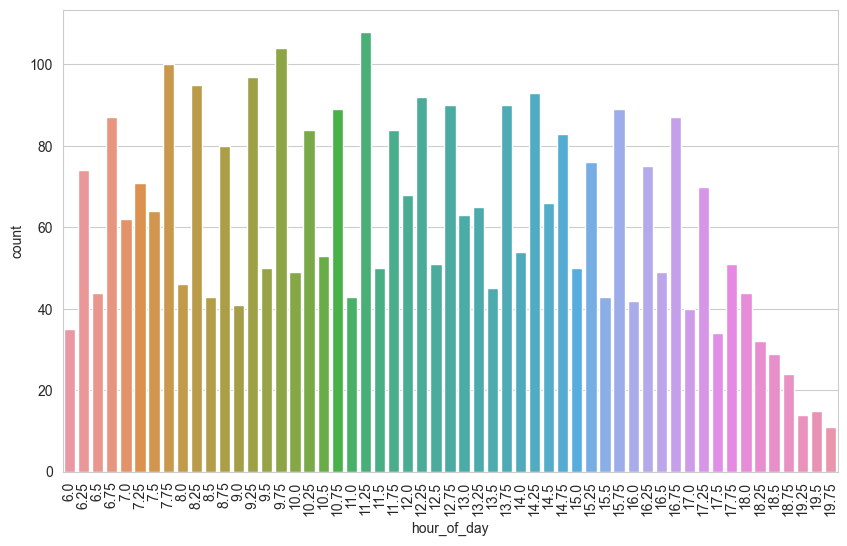

In [50]:
# plot trip count by hour of day
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(data=trip_data, x='hour_of_day')